In [21]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [49]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
import matplotlib.pyplot as plt

In [8]:
raw_df = pd.read_csv('TQQQ.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,63.990002,64.779999,63.799999,64.379997,64.356720,12140500
1,2019-09-17,64.360001,65.290001,63.980000,65.230003,65.206421,11349500
2,2019-09-18,64.860001,65.269997,62.750000,65.190002,65.166435,17757900
3,2019-09-19,65.529999,66.690002,65.099998,65.480003,65.456329,16596300
4,2019-09-20,65.760002,65.949997,62.740002,63.419998,63.397072,15439100


In [15]:
df = raw_df.iloc[:-1,[0,5]]

In [16]:
df

,Date,Adj Close
0,2019-09-16,64.356720
1,2019-09-17,65.206421
2,2019-09-18,65.166435
3,2019-09-19,65.456329
4,2019-09-20,63.397072
...,...,...
247,2020-09-08,121.620003
248,2020-09-09,132.070007
249,2020-09-10,124.430000
250,2020-09-11,121.709999


In [17]:
df.tail()

,Date,Adj Close
247,2020-09-08,121.620003
248,2020-09-09,132.070007
249,2020-09-10,124.430000
250,2020-09-11,121.709999
251,2020-09-14,127.980003


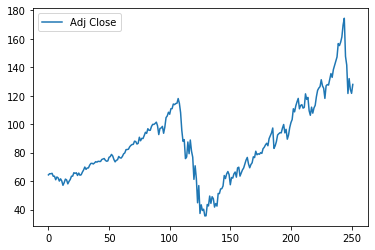

In [18]:
df.plot()

In [19]:
adfuller(df['Adj Close'])

(-1.2976230117032148,
 0.6302590858465122,
 9,
 242,
 {'1%': -3.457664132155201,
  '5%': -2.8735585105960224,
  '10%': -2.5731749894132916},
 1414.3174732699629)

In [22]:
adfuller(np.log(df['Adj Close']))

(-1.685649162696673,
 0.43852121422653667,
 9,
 242,
 {'1%': -3.457664132155201,
  '5%': -2.8735585105960224,
  '10%': -2.5731749894132916},
 -658.2174328141789)

In [23]:
a = df['Adj Close'][:126]
b = df['Adj Close'][126:]

In [26]:
a.tail()

121    70.760002
122    61.660000
123    44.759998
124    56.840000
125    37.250000
Name: Adj Close, dtype: float64

In [25]:
b.head()

126    43.320000
127    39.310001
128    40.220001
129    35.509998
130    35.619999
Name: Adj Close, dtype: float64

In [40]:
len(a),len(b)

(126, 126)

In [36]:
from scipy.stats import pearsonr

In [37]:
pearsonr(a,b)

(0.6353114185102287, 1.3452914206861695e-15)

In [45]:
def cov(a,b):
    mu_a = a.mean()
    mu_b = b.mean()
    S = 0
    for x,y in zip(a,b):
        S += (x - mu_a) * (y - mu_b)
    return S/len(a)

In [46]:
cov(a,b)

344.0760439790099

In [77]:
#ljungbox tests if the group of autocorrelations are different from zero. 
#h_0 means random amount uncorrelated with the other values, h_a means they are correlated with other terms
acorr_ljungbox(df['Adj Close'].diff(periods = 1)[1:], lags = range(20))

(array([50.59385544,  7.39020151, 16.34794281, 16.3567813 , 16.54039046,
        17.51716437, 22.72265051, 26.19125294, 33.95053614, 40.67165945,
        40.93965509, 40.93986602, 43.26071287, 44.96764511, 46.44336108,
        47.58146247, 47.75086877, 48.13716386, 48.70829559, 50.59385544]),
 array([           nan, 6.55801410e-03, 2.81896267e-04, 9.58115304e-04,
        2.37349723e-03, 3.61656922e-03, 8.94895130e-04, 4.65530515e-04,
        4.14735765e-05, 5.73922424e-06, 1.15651405e-05, 2.46814434e-05,
        2.03957765e-05, 2.11891087e-05, 2.37235344e-05, 2.97001243e-05,
        5.19736048e-05, 8.18213580e-05, 1.18060807e-04, 1.07115683e-04]))

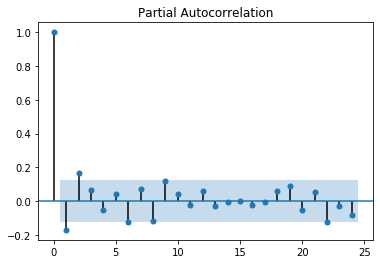

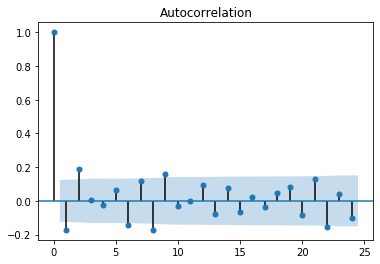

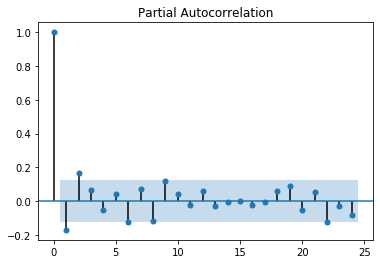

In [79]:
plot_acf(df['Adj Close'].diff(periods = 1)[1:])
plot_pacf(df['Adj Close'].diff(periods = 1)[1:])

In [82]:
from fbprophet import Prophet

In [94]:
def prophetize(data,p):
    '''
    Data and numbre of periods
    '''
    m = Prophet() #initailize
    
    #format data
    df = data.loc[:,['Date','Adj Close']]
    df.rename(columns = {'Date': 'ds', 'Adj Close': 'y'}, inplace = True)
    
    #fit and forecast
    model = m.fit(df) 
    future_frame = model.make_future_dataframe(periods=p, freq = 'W')
    forecast = model.predict(future_frame)
    
#     #Get summary stats
#     summary = pd.DataFrame()
#     summary['Original'] = data['Adj Close'].values
#     summary['Forecast'] = forecast['yhat'].values[:-4]
    
#     summary['Error'] = summary['Forecast'] - summary['Original']
#     summary['Error^2'] = summary['Error']**2
    
#     RMSE = np.sqrt(sum(summary['Error^2']/len(summary)))
    
    return (m,forecast)

In [161]:
m, forecast = prophetize(df,1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


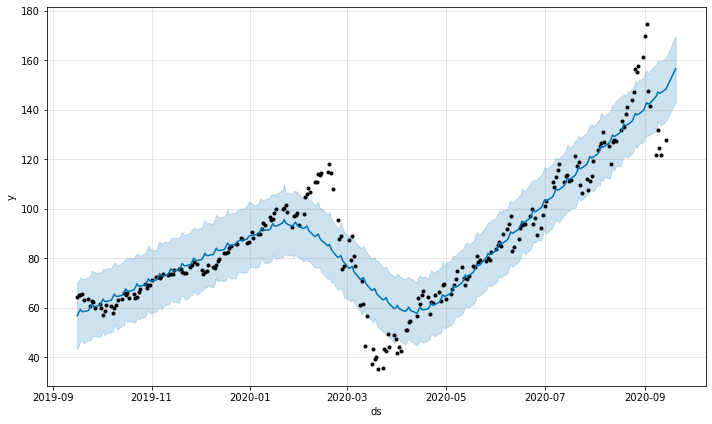

In [162]:
fig1 = m.plot(forecast)

In [108]:
for i in range(1,20):
    print(i , ' ' ,adfuller(df['Adj Close'].diff(periods = i)[i:])[1])
#keep a diferencing of 1 as the best

1   0.00013350964732157774
2   0.002812301390404287
3   0.009965811681207363
4   0.021386893968209173
5   0.030961407012671444
6   0.05948153022287729
7   0.14992386530534985
8   0.08544440286794713
9   0.11537678793679773
10   0.013753757479585692
11   0.014477869828758889
12   0.024417422389061742
13   0.04012972165920635
14   0.11401630466823781
15   0.09440285452495811
16   0.0006139116752489427
17   0.017868843259360303
18   0.012574544018489788
19   0.033828614186759434


In [136]:
differenced = df['Adj Close'].diff(periods = 1)[1:]

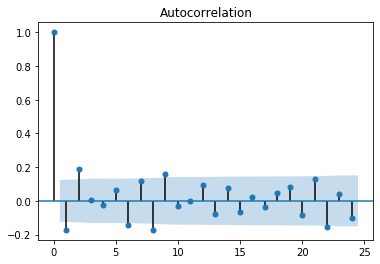

In [137]:
plot_acf(differenced)
plt.show()

In [139]:
acf = [1,2,6,8,9,22]

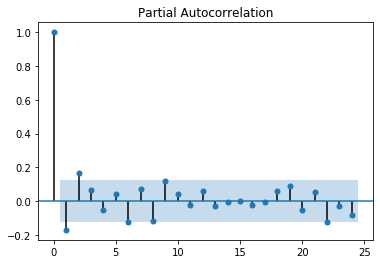

In [138]:
plot_pacf(differenced)
plt.show()

In [140]:
pacf = [1,2,6,8]

In [113]:
ARIMA(differenced, order = (0,1,0))

In [144]:
model = ARIMA(differenced, order = (1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -750.545
Method:                       css-mle   S.D. of innovations              4.814
Date:                Tue, 15 Sep 2020   AIC                           1509.089
Time:                        16:31:17   BIC                           1523.175
Sample:                             1   HQIC                          1514.759
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0017      0.004      0.479      0.632      -0.005       0.009
ar.L1.D.Adj Close    -0.1682      0.062     -2.693      0.007      -0.291      -0.046
ma.L1.D.Adj Close    -1.0000      0.015    -68.483      0.000      -1.029      -0.971
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.9454           +0.0000j            5.9454            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [151]:
minimum = 99999999
keys = None
best = None
for p in acf:
    for q in pacf:
        try:
            model = ARIMA(df['Adj Close'], order = (p,2,q)).fit()
            if model.aic < minimum:
                keys = (p,q)
                best = model
        except ValueError:
            continue
    print(keys)
print('The best pair is: {}'.format(keys))

(1, 2)
(2, 6)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/bas

(6, 8)
(8, 8)
(9, 2)
(9, 2)


(9, 2)

In [153]:
best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Adj Close   No. Observations:                  250
Model:                 ARIMA(9, 2, 2)   Log Likelihood                -738.099
Method:                       css-mle   S.D. of innovations              4.579
Date:                Tue, 15 Sep 2020   AIC                           1502.199
Time:                        16:50:18   BIC                           1547.978
Sample:                             2   HQIC                          1520.623
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0015      0.005      0.321      0.748      -0.008       0.011
ar.L1.D2.Adj Close     0.2741      0.419      0.654      0.513      -0.548       1.096
ar.L2.D2.Adj Close     0.2001      0.082      2.453      0.014       0.040       0.360
ar.L3.D2.Adj Close     0.0047      0.096      0.050      0.960      -0.183       0.192
ar.L4.D2.Adj Close    -0.0557      0.070     -0.801      0.423      -0.192       0.081
ar.L5.D2.Adj Close     0.0538      0.068      0.787      0.432      -0.080       0.188
ar.L6.D2.Adj Close    -0.1271      0.069     -1.834      0.067      -0.263       0.009
ar.L7.D2.Adj Close     0.0791      0.083      0.954      0.340      -0.083       0.242
ar.L8.D2.Adj Close    -0.1588      0.077     -2.056      0.040      -0.310      -0.007
ar.L9.D2.Adj Close     0.2032      0.083      2.458      0.014       0.041       0.365
ma.L1.D2.Adj Close    -1.3785      0.425     -3.240      0.001      -2.212      -0.545
ma.L2.D2.Adj Close     0.3785      0.425      0.890      0.373      -0.455       1.212
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0089           -0.4377j            1.0997           -0.4349
AR.2           -1.0089           +0.4377j            1.0997            0.4349
AR.3           -0.5427           -1.1069j            1.2328           -0.3226
AR.4           -0.5427           +1.1069j            1.2328            0.3226
AR.5            0.3248           -1.1984j            1.2417           -0.2079
AR.6            0.3248           +1.1984j            1.2417            0.2079
AR.7            1.0075           -0.6388j            1.1930           -0.0899
AR.8            1.0075           +0.6388j            1.1930            0.0899
AR.9            1.2201           -0.0000j            1.2201           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            2.6418           +0.0000j            2.6418            0.0000
-----------------------------------------------------------------------------
"""

In [163]:
forecast1 = best.forecast(steps = 4)[0]

In [164]:
forecast1

array([126.08378865, 135.30180716, 130.04593997, 133.90178673])

In [168]:
#prophet forecast
forecast['yhat'][-4:]

249    146.701880
250    146.986683
251    148.410841
252    156.679043
Name: yhat, dtype: float64